In [1]:

# import key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#! cd "C:\Users\jeanm\Anaconda3\envs\test\books\Repair_Cafe_Sept_2019"
# load the Repair_cafe data set into data_set_final database object
data_set_ORC = pd.ExcelFile(r"C:\Users\jeanm\Anaconda3\envs\test\books\Repair_Cafe_Sept_2019\data_set.xlsx")
data_set_final=data_set_ORC.parse("Sheet1")

In [3]:
# look at the data set
print(data_set_final.shape)
# remove the null items
data_set_final_2=data_set_final[data_set_final.iloc[:,1].isnull()!=True]
data_set_final_2.shape

(19095, 17)


(19049, 17)

In [4]:
# define the columns heads by the first line
data_set_header= data_set_final_2.columns
print(data_set_header)

Index(['Registration number', 'Kind of product', 'Category', 'Brand',
       'Build year (estimated)', 'Model, type or serial number',
       'Fault + probable cause', 'Defect found', 'Repaired: yes/half/no',
       'If yes: what did you do to repair it?',
       'If half: what did you do, which advice did you give?',
       'If no: why could you not repair it?',
       'Reparability score (1=difficult, 10=easy)',
       'Was repair information available?',
       'If yes: where did it come from, manufacturer or made by users?',
       'Source of repair information?', 'Hint'],
      dtype='object')


In [5]:
#exploration1: PRODUCT Kind of Product
data_set_final_2.groupby(by="Kind of product").count().iloc[:,0].sort_values(ascending = False).head(5)

Kind of product
Coffee maker      1535
Trousers/pants    1078
Bicycle           1046
Vacuum cleaner    1027
Lamp/lighting      902
Name: Registration number, dtype: int64

In [6]:
#there are 638 different types of products
# the 5 most repaired product Category are Coffee Maker, Trousers/pants, Bicycle, Vacuum cleaner and Lamp/lighting

In [7]:
#exploration2: PRODUCT Category
data_set_final_2.groupby(by="Category").count().iloc[:,0].sort_values(ascending = False)

Category
Household appliances electric        7123
Textile                              2686
Display and sound equipment          2601
Other                                1743
Computers/phones                     1307
Bicycles                             1296
Tools electric                        895
Household appliances non-electric     532
Tools non-electric                    329
Toys electric                         235
Furniture                             197
Toys non-electric                     104
Category                                1
Name: Registration number, dtype: int64

In [8]:
# there are 10 categories of products
# the 5 most repaired ones are "Household appliances electric", "Textile", "Display and SOund Equipment", "Other", and "Computers/phones"

In [9]:
#exploration3: BRANDS
print(data_set_final_2.groupby(by="Brand").count().iloc[:,0].sort_values(ascending = False).size)
data_set_final_2.groupby(by="Brand").count().iloc[:,0].sort_values(ascending = False).head(6)

2003


Brand
Unknown/n.a.    7393
Philips         1962
Sony             363
Bosch            319
Tefal            265
Samsung          239
Name: Registration number, dtype: int64

In [10]:
# amongst the 2003 brands registered the 5 most repaired are Philips, Sony, Bosch Tefal and Samsung

In [11]:
# exploration4: REPAIR SUCCESS
data_set_final_2.groupby(by="Repaired: yes/half/no").count().iloc[:,0].sort_values(ascending=False)[0:3]/data_set_final_2.shape[0]*100

Repaired: yes/half/no
yes     64.712058
no      22.919838
half    12.347105
Name: Registration number, dtype: float64

In [12]:
#64% of all products have been considered as repaired, 23% have not been successfully repaired, 12% have been "half" repaired

In [13]:
# what are the brands with the highest repair success?
data_repair_success=data_set_final_2.groupby(by=["Brand","Repaired: yes/half/no"]).count().iloc[:,0].sort_values(ascending=False).reset_index()
data_repair_success=data_repair_success.pivot(values="Registration number", columns="Repaired: yes/half/no", index="Brand")
data_repair_success["total"]=data_repair_success.sum(axis=1)
data_repair_success = data_repair_success.sort_values(by = "total", ascending = False)
#we drop the data repaired was stated ja or Repaired
data_repair_success= data_repair_success.drop(columns = ["ja","Repaired"], axis=0)
# we compute the percent or repair
data_repair_success["percent repaired"]=data_repair_success["yes"]/data_repair_success["total"]*100
#we remove the brands with less than 10 products repaired
data_repair_success=data_repair_success[data_repair_success["total"]>50]
print(data_repair_success.shape)
# 10 brands the most repairable
data_repair_success_best=data_repair_success.sort_values(by=["percent repaired"], ascending=False)
print(data_repair_success_best)

(40, 5)
Repaired: yes/half/no   half      no     yes   total  percent repaired
Brand                                                                 
Batavus                  5.0     5.0    90.0   100.0         90.000000
Giant                    NaN     7.0    61.0    68.0         89.705882
Gazelle                  8.0    10.0   149.0   167.0         89.221557
Unknown/n.a.           585.0  1027.0  5780.0  7392.0         78.192641
Pfaff                    9.0     8.0    52.0    69.0         75.362319
Sparta                   4.0    10.0    42.0    56.0         75.000000
Singer                  14.0    17.0    77.0   108.0         71.296296
Bestron                  5.0    13.0    38.0    56.0         67.857143
Miele                   17.0    67.0   148.0   232.0         63.793103
Philips                231.0   555.0  1175.0  1961.0         59.918409
Hema                     5.0    18.0    34.0    57.0         59.649123
Princess                 8.0    31.0    57.0    96.0         59.37500

In [14]:
# what are the kind of products with the highest repair success?
data_repair_success_kop=data_set_final_2.groupby(by=["Kind of product","Repaired: yes/half/no"]).count().iloc[:,0].sort_values(ascending=False).reset_index()
data_repair_success_kop=data_repair_success_kop.pivot(values="Registration number", columns="Repaired: yes/half/no", index="Kind of product")
data_repair_success_kop["total"]=data_repair_success_kop.sum(axis=1)
data_repair_success_kop = data_repair_success_kop.sort_values(by = "total", ascending = False)
#we drop the data repaired was stated ja or Repaired
data_repair_success_kop= data_repair_success_kop.drop(columns = ["ja","Repaired"], axis=0)
# we compute the percent or repair
data_repair_success_kop["percent repaired"]=data_repair_success_kop["yes"]/data_repair_success_kop["total"]*100
#we remove the product types with less than 10 products repaired
data_repair_success_kop=data_repair_success_kop[data_repair_success_kop["total"]>100]
print(data_repair_success_kop.shape)
# product types per repair rate
data_repair_success_kop=data_repair_success_kop.sort_values(by=["percent repaired"], ascending=False)
print(data_repair_success_kop)

(42, 5)
Repaired: yes/half/no            half     no     yes   total  percent repaired
Kind of product                                                               
Knife/knives/scissors             3.0    2.0   269.0   274.0         98.175182
Shirt                             NaN    2.0   100.0   102.0         98.039216
Trousers/pants                   14.0   17.0  1047.0  1078.0         97.124304
Pruning shears / Garden shears    2.0    5.0   136.0   143.0         95.104895
Sweater                           2.0    2.0    97.0   102.0         95.098039
Blouse                            2.0    4.0   108.0   114.0         94.736842
Dress                             5.0    2.0   122.0   129.0         94.573643
Coat                             12.0   13.0   310.0   335.0         92.537313
Bicycle lighting                  3.0    6.0    92.0   101.0         91.089109
Bag                               5.0    7.0    99.0   111.0         89.189189
Bicycle                          47.0   78.0

In [15]:
# what are the product Category with the highest repair success?
data_repair_success_C=data_set_final_2.groupby(by=["Category","Repaired: yes/half/no"]).count().iloc[:,0].sort_values(ascending=False).reset_index()
data_repair_success_C=data_repair_success_C.pivot(values="Registration number", columns="Repaired: yes/half/no", index="Category")
data_repair_success_C["total"]=data_repair_success_C.sum(axis=1)
data_repair_success_C = data_repair_success_C.sort_values(by = "total", ascending = False)
#we drop the data repaired was stated ja or Repaired
data_repair_success_C= data_repair_success_C.drop(columns = ["ja","Repaired"], axis=0)
# we compute the percent or repair
data_repair_success_C["percent repaired"]=data_repair_success_C["yes"]/data_repair_success_C["total"]*100
print(data_repair_success_C.shape)
# sort by repair rate
data_repair_success_C=data_repair_success_C.sort_values(by=["percent repaired"], ascending=False)
print(data_repair_success_C)

(13, 5)
Repaired: yes/half/no               half      no     yes   total  \
Category                                                           
Textile                             61.0    75.0  2549.0  2686.0   
Tools non-electric                  14.0    16.0   299.0   329.0   
Bicycles                            65.0   107.0  1124.0  1296.0   
Household appliances non-electric   52.0    79.0   401.0   532.0   
Furniture                           30.0    21.0   146.0   197.0   
Other                              183.0   332.0  1227.0  1742.0   
Toys non-electric                   12.0    24.0    68.0   104.0   
Household appliances electric      928.0  2090.0  4105.0  7123.0   
Toys electric                       33.0    73.0   129.0   235.0   
Tools electric                     123.0   288.0   484.0   895.0   
Computers/phones                   352.0   353.0   602.0  1307.0   
Display and sound equipment        499.0   908.0  1193.0  2600.0   
Category                             NaN

In [16]:
# one can notice the impact of "being electric" on the reparability of a product category. 
# can this be linked to the age (i.e. non electric stuff are older...)

In [17]:
# Exploration5 : BUILD YEAR
data_set_final_2.dtypes
#Build year is an object type. Let's cast it to a float value
data_set_final_2.loc[:,"my_build_year"]=pd.to_numeric(data_set_final_2["Build year (estimated)"], errors='coerce')
#clean the "my_build_year" column by removing values out of 1800 - 2019, which represent 1 half of the values
data_set_final_2.loc[:,"my_build_year"]=[my_year if (my_year>1800 and my_year<2020) else np.nan for my_year in data_set_final_2["my_build_year"]]
#let's now explore the mean age of the categories
data_repair_success_C_Y=data_set_final_2.groupby(by=["Category"]).mean(numeric_only=True)
data_repair_success_C_Y.loc[:,"my_build_year"]=[my_year if np.isnan(my_year)==True else round(my_year,1) for my_year in data_repair_success_C_Y["my_build_year"]]
data_repair_success_C_Y

C:\Users\jeanm\Anaconda3\envs\test\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\jeanm\Anaconda3\envs\test\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,my_build_year
Category,
Bicycles,2005.9
Category,NaN
Computers/phones,2010.4
Display and sound equipment,2001.3
Furniture,1993.1
Household appliances electric,2006.6
Household appliances non-electric,1994.0
Other,1999.2
Textile,2010.4


In [18]:
#let's group the 2 databases together into one
data_repair_success_C_final=pd.merge(data_repair_success_C,data_repair_success_C_Y, how="left", on="Category")
#we remove the useless last line
data_repair_success_C_final=data_repair_success_C_final.drop(['Category'])
data_repair_success_C_final

,half,no,yes,total,percent repaired,my_build_year
Category,,,,,,
Textile,61.0,75.0,2549.0,2686.0,94.899479,2010.4
Tools non-electric,14.0,16.0,299.0,329.0,90.881459,2001.8
Bicycles,65.0,107.0,1124.0,1296.0,86.728395,2005.9
Household appliances non-electric,52.0,79.0,401.0,532.0,75.375940,1994.0
Furniture,30.0,21.0,146.0,197.0,74.111675,1993.1
Other,183.0,332.0,1227.0,1742.0,70.436280,1999.2
Toys non-electric,12.0,24.0,68.0,104.0,65.384615,1994.9
Household appliances electric,928.0,2090.0,4105.0,7123.0,57.630212,2006.6
Toys electric,33.0,73.0,129.0,235.0,54.893617,2007.6


In [19]:
#let's improve the table with more features
# electric of not electric
data_repair_success_C_final.loc[:,"electric"]=["YES" if (" electric" in my_cat)==True else "NO" for my_cat in data_repair_success_C_final.index ]
data_repair_success_C_final.loc[data_repair_success_C_final.tail(2).index,"electric"]="YES"
data_repair_success_C_final=data_repair_success_C_final.sort_index(inplace=False)
data_repair_success_C_final

,half,no,yes,total,percent repaired,my_build_year,electric
Category,,,,,,,
Bicycles,65.0,107.0,1124.0,1296.0,86.728395,2005.9,NO
Computers/phones,352.0,353.0,602.0,1307.0,46.059679,2010.4,YES
Display and sound equipment,499.0,908.0,1193.0,2600.0,45.884615,2001.3,YES
Furniture,30.0,21.0,146.0,197.0,74.111675,1993.1,NO
Household appliances electric,928.0,2090.0,4105.0,7123.0,57.630212,2006.6,YES
Household appliances non-electric,52.0,79.0,401.0,532.0,75.375940,1994.0,NO
Other,183.0,332.0,1227.0,1742.0,70.436280,1999.2,NO
Textile,61.0,75.0,2549.0,2686.0,94.899479,2010.4,NO
Tools electric,123.0,288.0,484.0,895.0,54.078212,2005.6,YES


<function matplotlib.pyplot.show(*args, **kw)>

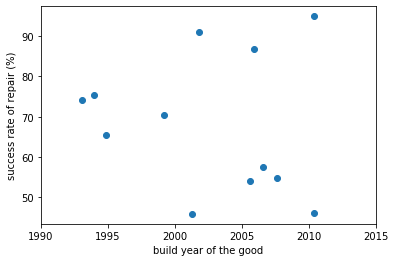

In [20]:
#let's plot everything

plt.scatter(data_repair_success_C_final["my_build_year"], data_repair_success_C_final["percent repaired"])
plt.xlabel("build year of the good")
plt.ylabel("success rate of repair (%)")
plt.xlim(1990, 2015)
plt.show